# Topic 5: Multilayer Perceptron
## Associated Reading: Bishop 5.1, 5.2, 5.3

# 1 When does logistic regression fail?
Imagine that you're a wildlife biologist, and you're conducting a study on the activity habits of whitetail deer.  
<img src="images/deer.jpg">
As any hunter knows, deer activity varies depending on time of day, and this time-varying level of activity is what you're tasked with quantifying.  In particular, what you want to do is to fit a model that asks the question: if I am sitting at a particular spot at a particular time of day, what is the probability that I will see a whitetail deer?  

In principle, this is precisely the type of question that we might be interested in using logistic regression for.  We have a feature $\mathbf{x}$, which is the time of day, as well as a binary outcome $y\in\{0,1\}$ (whether we see a deer or not) for which we'd like to generate a probability.  What do we need to fit this model?  

Of course, to begin with we'll need a dataset.  To collect such a dataset we could simply put out a camera (strapped to a tree, for example), set it to take pictures at random and determine whether there is a deer in the image (we could determine this by hand or using a machine learning algorithm to automatically process the image, something that we'll get to in this course!).  In full disclosure, the dataset that I'll provide here is synthetically generated (i.e. it's from a simulation).  However, let's suspend disbelief and imagine that we've done what we described above. 

In [1]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [18,15]
mpl.rcParams['font.size'] = 18
import matplotlib.pyplot as plt

x,y = np.loadtxt('datasets/deer.npy')
x = x[::5]
y = y[::5]
idx = np.argsort(x)
x = x[idx]
y = y[idx]
y_obs = np.reshape(y,(len(y),1))



plt.hist(x[y==0],bins=24,histtype='step',label='no deer')
plt.hist(x[y==1],bins=24,histtype='step',label='deer')
plt.xlabel('Normalized time')
plt.ylabel('Count')
plt.legend()
plt.show()

<Figure size 1800x1500 with 1 Axes>

Now we'd like to fit a logistic regression model.  As with the lobster problem, it's helpful to have normalized features so that gradient descent converges easily.  We can basically lift the code from that problem for running gradient descent:

In [2]:
def sigmoid(a):
    return 1./(1+np.exp(-a))

def L(y_obs,y_pred):
    return -1./len(y_obs)*np.sum(y_obs*np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))

def grad(y_obs,y_pred,phi):
    return phi.T @ (y_pred-y_obs)

w = np.random.randn(2,1)
phi = np.vstack((np.ones_like(x),x)).T

eta = 1e-4
for i in range(50):
    y_pred = sigmoid(phi @ w)
    w -= eta*grad(y_obs,y_pred,phi)  
    print(L(y_obs,y_pred))

0.8786697290500332
0.8569299803932995
0.8374856969848603
0.8201428900745675
0.8047117170881404
0.7910097075637819
0.778864112746626
0.7681134650395309
0.7586084633820206
0.7502123114130197
0.7428006323201244
0.7362610726744268
0.7304926914750045
0.7254052131459108
0.7209182063526134
0.7169602353863977
0.7134680180262726
0.7103856133312062
0.7076636545937302
0.705258636424093
0.7031322603110427
0.7012508397031958
0.6995847633860122
0.6981080144474493
0.696797741228193
0.6956338761788888
0.6945987983720373
0.6936770354451921
0.6928550009141897
0.6921207630387642
0.6914638417112439
0.6908750301463812
0.6903462384593039
0.6898703565177257
0.689441133736929
0.6890530737477004
0.6887013421065885
0.6883816854342224
0.6880903605615983
0.6878240724373536
0.6875799197026579
0.6873553469760904
0.6871481030104467
0.6869562039885141
0.6867779013170078
0.6866116533585789
0.6864561006124025
0.6863100439155482
0.6861724252912363
0.6860423111171183


In [3]:
y_obs.shape

(2000, 1)

This is a pretty easy problem, so gradient descent converges in just a handful of iterations.  Let's plot our predictions.  We'll just plot the histograms from before, as well as the outut of the sigmoid. 

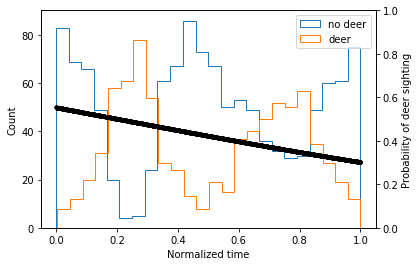

In [4]:
plt.hist(x[y==0],bins=24,histtype='step',label='no deer')
plt.hist(x[y==1],bins=24,histtype='step',label='deer')
plt.xlabel('Normalized time')
plt.ylabel('Count')
plt.legend()
ax = plt.twinx()
ax.plot(x,y_pred,'k.')
ax.set_ylabel('Probability of deer sighting')
ax.set_ylim(0,1)
plt.show()

Huh.

It appears to be the case that logistic regression is telling us that there always about a 40% chance of seeing a deer, regardless of the time of day.  While this is a bit underwhelming, logistic regression is actually performing as well as can be expected in this case: gradient descent has been successful, and this is indeed the optimized model.  Please answer the following two questions:
- **Why is the model predicting a uniform value for the probability, even though the data clearly show probability as a function of time?**
- **Why does the model predict 40% everywhere?**

We can perhaps gain some insight here by attempting to adjust the sigmoid by hand.  Let's start with some random one.

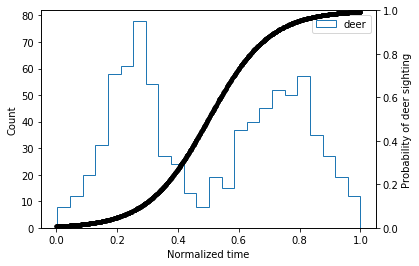

In [5]:
plt.hist(x[y==1],bins=24,histtype='step',label='deer')
plt.xlabel('Normalized time')
plt.ylabel('Count')
plt.legend()

ax = plt.twinx()
w_random = np.array([-5,10])
y_pred = sigmoid(phi@w_random)
ax.plot(x,y_pred,'k.')
ax.set_ylabel('Probability of deer sighting')
ax.set_ylim(0,1)
plt.show()

We want this curve to be high whenever the sighting count is high and low otherwise.  We have two modes of adjustment.  We can vary $w_0$, which does this:

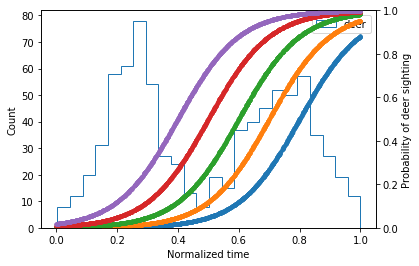

In [6]:
plt.hist(x[y==1],bins=24,histtype='step',label='deer')
plt.xlabel('Normalized time')
plt.ylabel('Count')
plt.legend()

ax = plt.twinx()
for w_0 in range(-8,-3):
    w_random = np.array([w_0,10])
    y_pred = sigmoid(phi@w_random)
    ax.plot(x,y_pred,'.')
ax.set_ylabel('Probability of deer sighting')
ax.set_ylim(0,1)
plt.show()

Or we can adjust $w_1$, which does this:

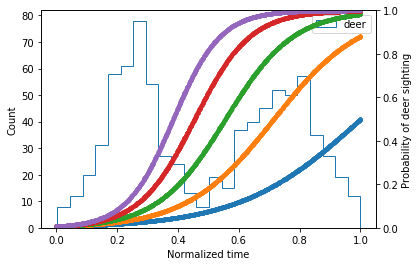

In [7]:
plt.hist(x[y==1],bins=24,histtype='step',label='deer')
plt.xlabel('Normalized time')
plt.ylabel('Count')
plt.legend()

ax = plt.twinx()
for w_1 in range(5,15,2):
    w_random = np.array([-5,w_1])
    y_pred = sigmoid(phi@w_random)
    ax.plot(x,y_pred,'.')
ax.set_ylabel('Probability of deer sighting')
ax.set_ylim(0,1)
plt.show()

**Is there a good way to adjust the logistic function using these two knobs such that it gives a good prediction everywhere?**  The answer, of course, is no: the bimodality of the data makes it so that it's quite impossible for the logistic function, which can only split the domain into one region each of high probability and low probability, to fit well.  As such, the optimization procedure essentially throws up its hands and says "the best I can do is to default to the prior distribution, which is about a 40% chance of success.  This is pretty much what will *always* happen with logistic regression whenever there isn't a single point that represents a sensible decision boundary between the success and failure class (this boundary becomes a line in 2D, a plane in 3D, and so on).

## 5.2 Data transformation
The problem isn't necessarily hopeless though.  Notice that the features are fixed and known.  As such, we could try to transform the features into something that is more amenable to the assumptions of logistic regression.  To put this concretely, rather than using $x$ (the time) as a feature, we could use $f(x)$ as a feature, where $f(x)$ is some function that we can choose.  For example, we could hypothesize that maybe taking the negative exponential of the feature might yield a better behaved problem: 

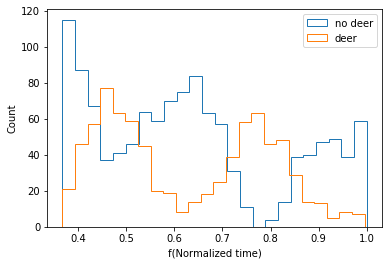

In [8]:
xhat = np.exp(-x)
plt.hist(xhat[y==0],bins=24,histtype='step',label='no deer')
plt.hist(xhat[y==1],bins=24,histtype='step',label='deer')
plt.xlabel('f(Normalized time)')
plt.ylabel('Count')
plt.legend()
plt.show()

But of course it doesn't, because $f(x) = \mathrm{e}^{-x}$ is monotonic.  **Come up with some function that would transform the data such that the notion of a single, pointwise decision boundary becomes more reasonable.** 

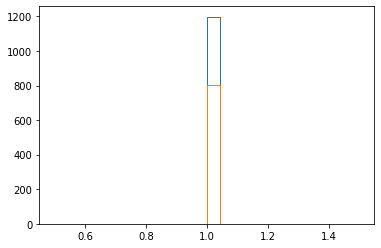

In [9]:
def f(x):
    """ Define a function that transforms the data into something that can be used with logistic regression."""
    return np.ones_like(x)  # This is just a placeholder

xhat = f(x)
plt.hist(xhat[y==0],bins=24,histtype='step',label='no deer')
plt.hist(xhat[y==1],bins=24,histtype='step',label='deer')
plt.show()

<img src="images/fighting.jpg">

Once you've completed the above exercise, you can look at the very reasonable choice that I've suggested below.

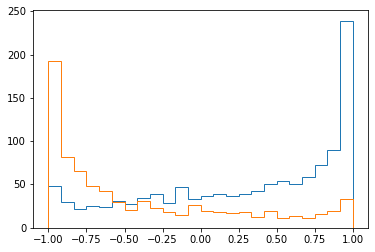

In [10]:
xhat = np.cos(4*np.pi*x)
plt.hist(xhat[y==0],bins=24,histtype='step',label='no deer')
plt.hist(xhat[y==1],bins=24,histtype='step',label='deer')
plt.show()


By taking the cosine (adjusted for twice-daily surge of deer activity), we transform the data into two unimodal populations, which is just what we'd like for using logistic regression.  In fact, we can fit this dataset using logistic regression pretty well.

In [11]:
w = np.random.randn(2,1)
phi = np.vstack((np.ones_like(xhat),xhat)).T

eta = 1e-3
for i in range(50):
    y_pred = sigmoid(phi @ w)
    w -= eta*grad(y_obs,y_pred,phi)  
    print(L(y_obs,y_pred))

0.8768109010576381
0.6899485455447807
0.6207072375680945
0.5919696556668809
0.5773325220497416
0.5688414627456853
0.5635641336704658
0.5601557510563955
0.5579007048041819
0.5563832662235674
0.5553490001471216
0.5546368640090452
0.5541424665047514
0.5537968926409179
0.5535539763747438
0.5533824155647171
0.5532607709672419
0.5531742331639905
0.5531124985508263
0.5530683546342637
0.55303672655017
0.5530140278390653
0.5529977144728623
0.5529859761611863
0.5529775212743403
0.5529714261445893
0.5529670289629282
0.5529638547634242
0.5529615621975781
0.5529599056540909
0.5529587082295223
0.5529578423986056
0.5529572161645828
0.5529567631198526
0.5529564353030153
0.5529561980595027
0.5529560263400691
0.5529559020325802
0.5529558120372433
0.5529557468772711
0.5529556996954993
0.5529556655294133
0.552955640787133
0.5529556228685272
0.5529556098911855
0.5529556004921837
0.5529555936846459
0.5529555887539422
0.5529555851825578
0.5529555825957034


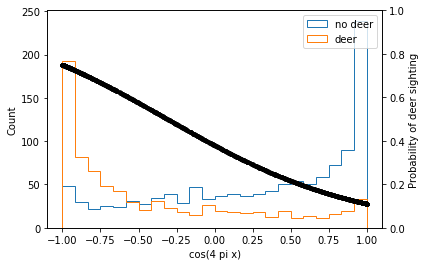

In [12]:
plt.hist(xhat[y==0],bins=24,histtype='step',label='no deer')
plt.hist(xhat[y==1],bins=24,histtype='step',label='deer')
plt.xlabel('cos(4 pi x)')
plt.ylabel('Count')
plt.legend()
ax = plt.twinx()
ax.plot(xhat,y_pred,'k.')
ax.set_ylabel('Probability of deer sighting')
ax.set_ylim(0,1)
plt.show()

In $f(x)=\mathrm{cos \;4\pi x}$-space, we get a pretty nice fit to the data.  However, it's easier to interpret back in normal $x$ space.  Since the transformation between $x$ and $f(x)$ is fixed and known, it's easy to plot the probabilities as a function of $x$, rather than as a function of $f(x)$.

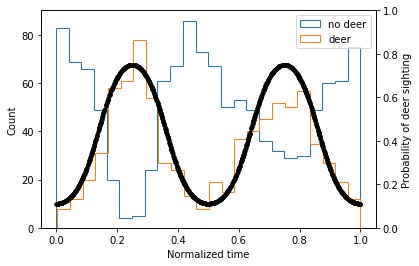

In [13]:
plt.hist(x[y==0],bins=24,histtype='step',label='no deer')
plt.hist(x[y==1],bins=24,histtype='step',label='deer')
plt.xlabel('Normalized time')
plt.ylabel('Count')
plt.legend()
ax = plt.twinx()
ax.plot(x,y_pred,'k.')
ax.set_ylabel('Probability of deer sighting')
ax.set_ylim(0,1)
plt.show()

Pretty nice.  We've established that even though logistic regression doesn't work very well for certain patterns of data (i.e. bimodal data), it can work very well if we can transform the features such that the assumptions of logistic regression are satisfied.

## 5.3 The trouble
While data transformation is very powerful, using it as we did above becomes problematic in more challenging cases.  In particular, our capacity to use expert judgement to come up with a sensible function to use as a transformation mechanism becomes prohibitive as the dimensionality of the data becomes large.  Thus, we need to come up with an *automatic* method for transforming this data such that it is amenable for use in logistic (or softmax) regression.

## 5.4 Graphical models
Before we tackle the problem of automatic data transformation, it will be useful to write our models graphically, just to keep things straight.  We'll write square nodes for input features, and lines indicating multiplication, with the coefficient of that multiplication written above the line.  Circular nodes will represent a function that takes as input $a$, which is a sum of all the inputs going to that node, and outputs $z$.  With this notation we can easily write normal logistic regression as
<img src="addme.jpg">
The model that we came up with above would be written as
<img src="addme.jpg">
If we're interested in outputting an objective function value from our graph instead of a prediction, that just adds another node onto the end of the graph.  

## 5.5 Hidden layers
Each of these models are in fact (very simple) neural networks, where we map directly from input to prediction to cost function, by the way of these simple activation functions: the identity corresponds to values on the real line, the sigmoid to predicting binary classses, etc.  These activations act on fixed basis functions specified by the input: the ones column, the $x_1$ column, etc.  What if we decided to incorporate an intermediate layer that could somehow mix up the basis functions into alternative basis functions that we would then feed to our activation.  For example, what if instead of just feeding weighted combinations of features to the logistic function, we instead preprocessed those data into a different set of basis functions?  Perhaps we wouldn't be able to understand exactly what those basis functions were, but they would give our model more flexibility.  

Let's introduce another set of activation functions that our inputs pass through before they reach the sigmoid.  This layer of nodes is referred to as a \emph{hidden layer}.  In principle, we could have as many as we want.  These activation functions \emph{must} be non-linear for this to be useful.  **What happens when we use the identity as an activation function in this intermediate layer?:**  

In practice, using the logistic function itself is a popular choice, but there are many(!) other possibilities.  The primary use of this is that a linear combination of sigmoids is a *universal function approximator*, which is to say that if we take the linear combination of enough of these things, then we can approximate any function that we want to.  For example, what if we wanted to approximate a bell curve: we could use two sigmoids with opposite signs and different translations, which would add up to something approximating a bell curve.  What happens if we wanted to approximate a line?  This wouldn't work because there are these plateaus, right?  It still works, because we could just make one of our sigmoids highly diffuse, so that only this roughly linear interior section is in play, then simply ignore the second one by setting its output weight to zero.  Two sigmoids actually have the capacity to roughly mimic pretty much anything that is linear of unimodal:  pretty much anything with one peak or less.  If we increase the number of nodes in the hidden layer, then we can mimic even more functions, like a sinusoid: for our deer problem, we can use a bank of sigmoids to approximate the sinusoidal transformation we came up with heuristically above!  In particular, we'll use the following graph
<img src="addme.jpg">

Note that this structure is often called a multi-layer perceptron.  This is sort of an unfortunate name, because it does not, in fact use perceptrons anywhere.  A perceptron is just a funny name for Heaviside regression, which is just like logistic regression, but instead of using the regression function, it uses the heaviside function.  It turned out to not be a particularly useful method for classification, but for some reason the name stuck when it came to neural networks.    

## 5.6 Feedforward neural network
The complexity of this graph belies the fact that it's actually pretty simple to write a mathematical expression here.  The computation proceeds sequentially
$$
A^{(1)} = X W^{(1)} + b^{(1)}
$$
$$
Z^{(1)} = \sigma(A^{(1)})
$$
$$
A^{(2)} = Z^{(1)} W^{(2)} + b^{(2)}
$$
$$
Z^{(2)} = y_{pred} = \sigma(A^{(2)}).
$$
**work out the dimensions of this computation, and ensure that they make sense**.  Running a set of features $X$ through this set of linear and non-linear functional compositions leads to a binary prediction, just as in logistic regression.  But how do we train this model?  We now have two matrices of parameters $W$ (of different sizes).  How do we proceed?



[[0.57240596]
 [0.57264518]
 [0.57297912]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]


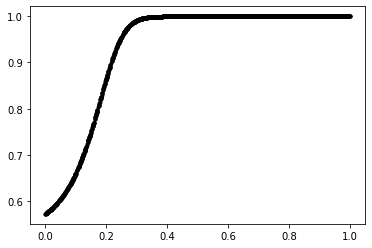

In [14]:
m = len(x)
n_0 = 1
n_1 = 4
N = 1

np.random.seed(42)

X = x.reshape((m,n_0))

W1 = 10*np.random.randn(n_0,n_1)
W2 = 10*np.random.randn(n_1,N)

b1 = 10*np.random.randn(1,n_1)#np.array([0.,4,8,12.])
b2 = 10*np.random.randn(1,N)


def sigmoid(a):
    return 1./(1+np.exp(-a))

def L(y_obs,y_pred):
    return -np.sum(y_obs*np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))

def grad(y_obs,y_pred,phi):
    return phi.T @ (y_pred-y_obs)


def feedforward(X,W1,W2,b1,b2):
    # Feedforward
    A1 = X@W1 + b1
    Z1 = sigmoid(A1)
    A2 = Z1@W2 + b2
    y_pred = sigmoid(A2)
    return y_pred,Z1

y_pred,Z1 = feedforward(X,W1,W2,b1,b2)
print(y_pred)
plt.plot(X,y_pred,'k.')

## 5.7 Backpropagation

Despite the mystique, the neural network is just a model like any other (albeit an extraordinarily flexible one), written as
\begin{equation}
y_{pred} = F(X,W).
\end{equation}
For it to be useful, we still need to find parameter values: we need to train the model.  Consider the case of logistic regression, but with a hidden layer added.  This thing is really not so different from just vanilla logistic regression: we've added an additional layer of complexity, but the output remains the same, and as such, it's reasonable to assume the same misfit, and also to assume that we can solve this problem via the same technique: gradient descent. 

We seek the derivative of a cost function with respect to an arbitrary weight in the network
\begin{equation}
\frac{\partial J}{\partial W^{(l)}_{ij}}.
\end{equation}
As we saw, on graphs like the neural network, we can use the chain rule to propagate changes in misfit back through the network's function transformations, hence the name \emph{backpropagation}.  For the final layer, we proceed very similarly to how we did for the single layer networks:
\begin{equation}
\frac{\partial J}{\partial w^{(L)}_{ij}} = \frac{\partial J}{\partial z^{(L)}_{j}} \frac{\partial z^{(L)}_{j}}{\partial a_j^{(L)}} \frac{\partial a_j^{(L)}}{\partial w^{(L)}_{ij}}.
\end{equation}
Using our result from above, we have that
\begin{equation}
\frac{\partial J}{\partial w^{(L)}_{ij}} = \underbrace{(z^{(L)}_j - y)}_{\delta_j^{(L)}} z_{i}^{(L-1)},
\end{equation}
where we've specified the value $\delta_j^{(l)}$, which is the magnitude of the error signal propagated to $w_{ij}$.  With that in mind, we have 
\begin{equation}
\frac{\partial J}{\partial w^{(L)}_{ij}} = \underbrace{\delta_j^{(L)}}_{\text{backprop. error}} \underbrace{z_{i}^{(L-1)}}_{\text{forward prop. magnitude}}.
\end{equation}

For deeper network layers, the situation is marginally more complex.  For a weight $w_{ij}^{(l)}$, $l\neq L$, we perform the same chain rule differentiation:
\begin{equation}
\frac{\partial J}{\partial w^{(l)}_{ij}} = \frac{\partial J}{\partial z^{(l)}_{j}} \frac{\partial z^{(l)}_{j}}{\partial a_j^{l)}} \frac{\partial a_j^{(l)}}{\partial w^{(l)}_{ij}}.
\end{equation}
However, we can't directly compute $\frac{\partial J}{\partial z^{(l)}_{j}}$ anymore, because there are now other nodes in the way.  This isn't a problem however.  We can use the chain rule again, this time to expand  $\frac{\partial J}{\partial z^{(l)}_{j}}$:
\begin{equation}
\frac{\partial J}{\partial z^{(l)}_{j}} = \sum_{k=1}^{N^{(l+1)}} \frac{\partial J}{\partial z_k^{(l+1)}}\frac{\partial z_k^{(l+1)}}{\partial a_k^{(l+1)}} \frac{\partial a_k^{(l+1)}}{\partial z_j^{(l)}}.
\end{equation}  
This seems quite messy until you recognize that we \emph{already computed} the first two terms.  We even gave them a name: $\delta$.  This now simplifies to 
\begin{equation}
\frac{\partial J}{\partial z^{(l)}_{j}} = \sum_{k=1}^{N^{(l+1)}} \delta_k^{(l+1)} w^{(l+1)}_{jk},
\end{equation}
where we've also substituted $\frac{\partial a_k^{(l+1)}}{\partial z_j^{(l)}} = w^{(l+1)}_{jk}$.  We can now define a $\delta$ for the current layer
\begin{equation}
\delta_j^{(l)} = (\sum_{k=1}^{N^{(l+1)}} \delta_k^{(l+1)} w^{(l+1)}_{jk}) f_j'(a_j^{(l)}),
\end{equation}
where $f_j^{(l)}(\cdot)$ is the activation function for layer $l$, node $j$, and $f'(a_j^{(l)})$ is its derivative (with respect to $a_j^{(l)}$), which leads to
\begin{equation}
\frac{\partial J}{\partial w^{(l)}_{ij}} = \underbrace{\delta_j^{(l)}}_{\text{backprop. error}} \underbrace{z_{i}^{(l-1)}}_{\text{forward prop. magnitude}},
\end{equation}
which is the same as for layer $L$, just with a different definition for $\delta$.  It's also even more clear why this is called backpropagation: the gradient for a given layer depends upon the layer in front of it, so the error feeds backwards through the neural network, just as the input feeds forward through the neural network.  There exists this kind of beautiful duality to this structure, where the forward model sweeps from left to right, and the backwards model (sometimes called the adjoint) sweeps from right to left. 

For implementation on a computer, all those sums are unwieldy and don't allow us to use the fast matrix multiplication libraries that are available.  The tensor version of these equations for softmax with cross-entropy objective function is as follows.  Beginning with the feed forward stage:
\begin{equation}
A^{(l)} = Z^{(l-1)} W^{(l)} + B^{(l)}
\end{equation}
\begin{equation}
Z^{(l)} = \sigma(A^{(l)})
\end{equation}
Note that $Z^{(0)}=X$, where $X$ is the $m \times n$ feature matrix.  

For backpropagation, the tensor form is 
\begin{equation}
\nabla_{W^{(l)}} \mathcal{J} = (Z^{(l-1)})^T\delta^{(l)}
\end{equation}
\begin{equation}
\nabla_{B^{(l)}} \mathcal{J} = \mathbf{1}^T \delta^{(l)}
\end{equation}
where $\mathbf{1}$ is the $m \times 1$ vector of ones, and
\begin{equation}
\delta^{(l)} = \begin{cases} (Z^{(l)} - \mathcal{T}),\; \text{if }l=L \\
                              \delta^{(l+1)} (W^{(l+1)})^T \circ \sigma'^{(l)}(A^{(l)}),\;\text{else}, \end{cases} 
\end{equation}
where $\mathcal{T}$ is the one-hot representation of the data labels, and $\circ$ represents the Hadamard product (aka elementwise multiplication).  Interestingly, this is also valid for the case of sum square error coupled with an identity activation on the final node, i.e. for regression problems.  In some sense, the gradient of the cost function becomes simple when natural choices of output activation and cost function are chosen.

The following function implements the backpropagation formula given above.

In [15]:
def backpropogate(y_pred,Z1,X,y_obs):
    # Backpropogate
    delta_2 = y_pred - y_obs
    grad_W2 = Z1.T @ delta_2
    grad_b2 = delta_2.sum(axis=0)

    delta_1 = delta_2 @ W2.T * Z1*(1-Z1)
    grad_W1 = X.T @ delta_1
    grad_b1 = delta_1.sum(axis=0) 
    return grad_W1,grad_W2,grad_b1,grad_b2


Note that we have gradients for *several* items: both weight matrices, as well as the bias vectors.  We can just update these separately, but all at the same time

In [16]:
eta = 1e-3
for i in range(100000):
    if i>20000:
        eta = 1e-4
    y_pred,Z1 = feedforward(X,W1,W2,b1,b2)
    grad_W1,grad_W2,grad_b1,grad_b2 = backpropogate(y_pred,Z1,X,y_obs)

    W1 -= eta*np.sign(grad_W1)
    W2 -= eta*np.sign(grad_W2)
    b1 -= eta*np.sign(grad_b1)
    b2 -= eta*np.sign(grad_b2)
    if i%100==0:
        print(i,L(y_obs,y_pred))

0 12236.146613446123
100 11371.520708304874
200 10514.985009116757
300 9669.623335008422
400 8839.00215184686
500 8027.163639570857
600 7238.605896706222
700 6478.266305145679
800 5751.543050187746
900 5064.412458666482
1000 4423.7178770255505
1100 3837.699799149992
1200 3316.7554306458965
1300 2874.1988143168523
1400 2526.4180989910674
1500 2289.8919299932368
1600 2136.2616481627947
1700 2009.6468941558173
1800 1902.391867647757
1900 1811.5584198859478
2000 1734.663698352694
2100 1669.4790260463656
2200 1614.1353919002804
2300 1567.1490561610071
2400 1526.0477973498064
2500 1488.2984031364124
2600 1454.0804471648223
2700 1423.8108405437067
2800 1398.05112985068
2900 1377.4416083049887
3000 1362.6398042180826
3100 1353.7003357050746
3200 1346.9769974429564
3300 1341.4393518066527
3400 1336.9931993433881
3500 1333.0966256569443
3600 1329.6112670418672
3700 1326.551945368578
3800 1323.8281160133845
3900 1321.181196101705
4000 1318.5830503712764
4100 1316.0353715912852
4200 1313.561124237

33600 1092.6232220669604
33700 1092.5553608826344
33800 1092.4876564287692
33900 1092.4199531678364
34000 1092.3522424979767
34100 1092.285259482444
34200 1092.2174771579512
34300 1092.150121426511
34400 1092.0830194060334
34500 1092.0153244885269
34600 1091.9484947277551
34700 1091.8816068707715
34800 1091.8145146733636
34900 1091.7477399633153
35000 1091.6806328993684
35100 1091.6136378312506
35200 1091.5465801108712
35300 1091.4798426375592
35400 1091.4130196566985
35500 1091.346183515401
35600 1091.2797444963207
35700 1091.2137091829354
35800 1091.146918040899
35900 1091.080759192992
36000 1091.014141953613
36100 1090.9480599567485
36200 1090.882049378906
36300 1090.815980883328
36400 1090.750374817772
36500 1090.6842011535894
36600 1090.6179368271537
36700 1090.5517269963912
36800 1090.4857959747858
36900 1090.4199608156882
37000 1090.3548958846427
37100 1090.2883915723855
37200 1090.2226817919075
37300 1090.1566026662158
37400 1090.0917160784159
37500 1090.0258522208412
37600 108

67000 1072.5255795160306
67100 1072.4777505035654
67200 1072.4298526077905
67300 1072.3825335252134
67400 1072.3348453413794
67500 1072.287237883955
67600 1072.239999480966
67700 1072.1929541201876
67800 1072.1460131423473
67900 1072.0991631095128
68000 1072.0527939977983
68100 1072.0060129657222
68200 1071.9601650584104
68300 1071.9143565540262
68400 1071.8684850282546
68500 1071.8230554990187
68600 1071.777442157074
68700 1071.7326686701774
68800 1071.6879306624112
68900 1071.6432493764785
69000 1071.5989378304669
69100 1071.554884585992
69200 1071.5113980071376
69300 1071.4675309116653
69400 1071.4240658663362
69500 1071.3808365969635
69600 1071.3376665284286
69700 1071.2941893048442
69800 1071.252088296568
69900 1071.209882492943
70000 1071.1675626754907
70100 1071.1254811702806
70200 1071.0833151090378
70300 1071.0414705922647
70400 1071.0004063562742
70500 1070.9593013458955
70600 1070.9171232895537
70700 1070.875688681489
70800 1070.834103140985
70900 1070.793008806485
71000 107

After fitting, how do we do?  We can compare the output of our neural network against the success probability for an empirical histogram of training data (note that this is actually a form of nearest neighbor classification).

[0.10526316 0.03030303 0.21428571 0.09756098 0.19512195 0.24444444
 0.20930233 0.57894737 0.58823529 0.90697674 0.9        1.
 1.         0.79069767 0.85416667 0.37142857 0.34042553 0.30434783
 0.225      0.18181818 0.10204082 0.19148936 0.04761905 0.16216216
 0.1627907  0.24444444 0.2        0.36111111 0.4        0.40384615
 0.6097561  0.47058824 0.56       0.65116279 0.625      0.61764706
 0.61363636 0.7173913  0.61363636 0.36363636 0.41463415 0.36363636
 0.32608696 0.33333333 0.175      0.17073171 0.10416667]


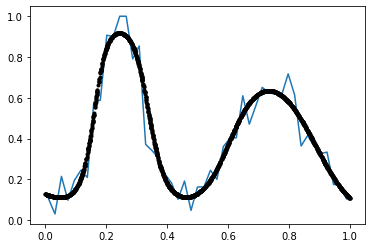

In [17]:
c1,b = np.histogram(x[y==1],bins=np.linspace(0,1,48))
c2,b = np.histogram(x[y==0],bins=np.linspace(0,1,48))
P1 = c1/(c1+c2)
print(P1)
plt.plot(0.5*(b[1:]+b[:-1]),P1)
plt.plot(x,y_pred,'k.')

Pretty good results for a problem that would have thwarted one of our earlier classifiers.  Let's examine what this thing is doing a little bit more deeply.  It's particularly interesting to look at the outputs of the hidden layer, or what basis functions the model decided to transform the data to before classification. 

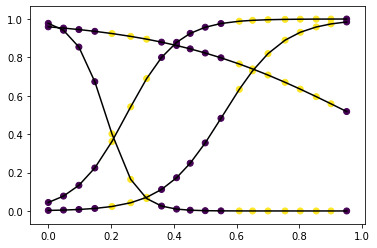

In [18]:
for i in range(4):
    plt.plot(x[::100],Z1[::100,i],'k-')
    plt.scatter(x[::100],Z1[::100,i],c=y_obs[::100].ravel())
plt.show()

These basis functions represent a transform of our data to a new four dimensional space.  It's instructive to see what we get when we add them up and scale them by some weights that we found with gradient descent: the linear combination of these learned features that get passed to logistic regression:

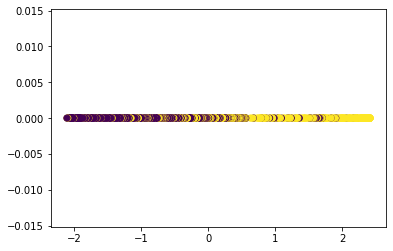

In [19]:
plt.scatter(Z1@W2 + b2,np.zeros((m)),c=y_obs)

Our neural network has effectively transformed our dataset into one that can reasonably be classified by the logistic function, just like we did manually via the cosine transform above!

## 5.8 A non-trivial example
We can also apply multilayer perceptrons to image data, just as we did with softmax.  This ends up being a pretty interesting exercise, because we can reshape the various weights on the first layer in order to give us a sense of **what features the neural networks is looking for**.  As it turns out, it does *not* look for the same combinations of features that softmax did.  

In [20]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# In order to run this in class, we're going to reduce the dataset by a factor of 5
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X[::5]
y = y.astype(int)[::5]
X,X_test,y,y_test = train_test_split(X,y)

# Here we specify the size of our neural network.  Out hidden layer has n_1=256 nodes, 
# while our output (softmax) has 10 classes

m = len(X)
n_0 = 784
n_1 = 256
N = 10

# Function to convert categorical labels into one-hot matrix.
def convert_to_one_hot(y,n_classes):
    T = np.zeros((y.shape[0],n_classes))
    for t,yy in zip(T,y):
        t[yy]=1   
    return T
T = convert_to_one_hot(y,N) 
T_test = convert_to_one_hot(y_test,N)

After importing our data, now we just need to setup our neural network.

In [21]:
np.random.seed(42)

# Initialize random parameter matrices
W1 = 0.001*np.random.randn(n_0,n_1)
W2 = 0.001*np.random.randn(n_1,N)

b1 = 0.1*np.random.randn(1,n_1)
b2 = 0.1*np.random.randn(1,N)

# Sigmoid function (activation)
def sigmoid(a):
    return 1./(1+np.exp(-a))

# Softmax function (final layer for classification)
def softmax(A):
    numerator = np.exp(A)
    denominator = numerator.sum(axis=1)
    return numerator/denominator[:,np.newaxis]  

# Categorical cross-entropy (what do these additional terms do?)
def L(T,S,W1,W2,alpha_1=1e-2,alpha_2=1e-5):
    return -1./len(T)*np.sum(T*np.log(S)) + np.sum(0.5*alpha_1*W1**2) + np.sum(0.5*alpha_2*W2**2)

# Run the neural network forward, given some weights and biases
def feedforward(X,W1,W2,b1,b2):
    # Feedforward
    A1 = X@W1 + b1
    Z1 = sigmoid(A1)
    A2 = Z1@W2 + b2
    y_pred = softmax(A2)
    return y_pred,Z1

# Compute the neural network gradients using backpropagation
def backpropogate(y_pred,Z1,X,y_obs,alpha_1=1e-2,alpha_2=1e-5):
    # Backpropogate
    delta_2 = (1./len(y_pred))*(y_pred - y_obs)
    grad_W2 = Z1.T @ delta_2 + alpha_2*W2
    grad_b2 = delta_2.sum(axis=0)

    delta_1 = delta_2 @ W2.T * Z1*(1-Z1)
    grad_W1 = X.T @ delta_1 + alpha_1*W1
    grad_b1 = delta_1.sum(axis=0) 
    return grad_W1,grad_W2,grad_b1,grad_b2

# Establish learning rate
eta = 1e-1

# Perform gradient descent
for i in range(500):
    y_pred,Z1 = feedforward(X,W1,W2,b1,b2)
    grad_W1,grad_W2,grad_b1,grad_b2 = backpropogate(y_pred,Z1,X,T)

    W1 -= eta*grad_W1
    W2 -= eta*grad_W2
    b1 -= eta*grad_b1
    b2 -= eta*grad_b2
    
    # Print some summary statistics every ten iterations
    if i%10==0:
        y_pred_test,Z1_test = feedforward(X_test,W1,W2,b1,b2)
        acc = sum(y_test==np.argmax(y_pred_test,axis=1))/len(y_test)
        print(i,L(T,y_pred,W1,W2),acc)

0 2.3069842427837877 0.2817142857142857
10 1.905573451350214 0.3282857142857143
20 1.2893030802780665 0.6114285714285714
30 1.0425632270713454 0.7174285714285714
40 0.6815483276559815 0.8574285714285714
50 0.628167479039886 0.8517142857142858
60 0.49107930889550533 0.8428571428571429
70 0.40750366439518254 0.9105714285714286
80 0.5216907723288443 0.8462857142857143
90 0.3603550600424711 0.9022857142857142
100 0.3136039949178427 0.9197142857142857
110 0.3927762827135394 0.8765714285714286
120 0.2726030980643582 0.9222857142857143
130 0.33121928169494136 0.8982857142857142
140 0.23807255711018538 0.9291428571428572
150 0.4051071119590684 0.8551428571428571
160 0.22674468403401746 0.9288571428571428
170 0.3194703459252898 0.8897142857142857
180 0.20541712634479112 0.9314285714285714
190 0.3112499925880293 0.8805714285714286
200 0.2006426221213078 0.9277142857142857
210 0.19920262242594655 0.928
220 0.2001098866711251 0.9248571428571428
230 0.23613501174973195 0.9185714285714286
240 0.2006

The input to each node in the hidden layer is a bunch of weights multiplied by a bunch of pixels and summed.  However, this time, rather than the resulting sums being interpreted as logits and going straight into the softmax, these sums become a new and transformed set of features, which then get multiplied with yet another set of weights before being input to softmax.  We can visualize this first set of weights as images, just as we did in the homework.

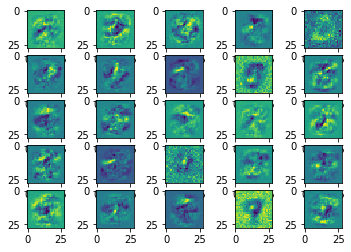

In [22]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(nrows=5,ncols=5)
axx = axs.ravel()
for _,ax in enumerate(axx):
    ax.imshow(W1[:,np.random.randint(n_1)].reshape((28,28)))

These weights are certainly less interpretable!  Rather than making a fuzzy looking zero and asking whether our input looks like that, now the network is saying something more like "you see that group of pixels in the upper right hand corner? those are helpful pixels for making a prediction, so we'll see if the input image has any intensity there.  And then we'll look for that funny blob of pixels in the middle.  If the input image has the first but not the second, then it's probably a zero.  If it's got both, it's probably an eight".  And so on.  Speaking of which, it's interesting to look at a confusion matrix for this problem.

In [46]:
#y_pred_test = np.argmax(y_pred_test,axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_test,y_test)

array([[356,   0,   0,   1,   0,   7,   3,   3,   2,   1],
       [  0, 385,   1,   0,   1,   1,   1,   3,   8,   1],
       [  1,   2, 343,  13,   1,   2,   4,   2,   8,   2],
       [  0,   1,   2, 348,   0,  12,   0,   3,  12,   3],
       [  0,   0,   5,   0, 300,   1,   2,   6,   0,  26],
       [  2,   2,   1,   6,   0, 286,   3,   0,  10,   3],
       [  1,   0,   4,   2,   7,   2, 335,   0,   4,   0],
       [  0,   1,   4,   5,   1,   1,   0, 307,   3,  17],
       [  1,   1,   2,   0,   1,   1,   1,   1, 324,   5],
       [  1,   0,   1,   0,   5,   1,   0,   1,   2, 272]])

Not much to be surprised about here: zeros are often confused for fives and sixes, while fours are confused for nines.  

## IC5A Confused images
*Human* error rates on this dataset are typically about 3%.  Our neural network has about a 6% error rate, so we're not quite there.  I'd like you to find examples from the test set where the neural network classified *incorrectly*, and see if you can determine the difference (without looking at the labels).  Is there a pattern to which digits are incorrectly classified?  

244


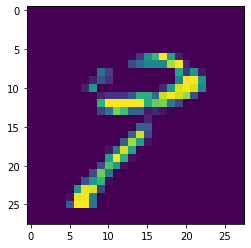

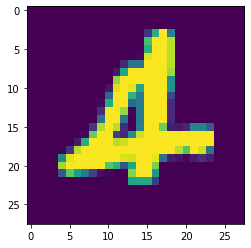

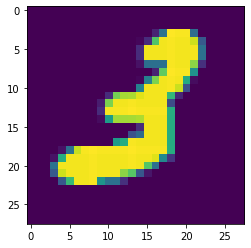

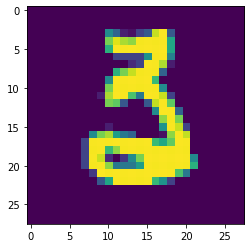

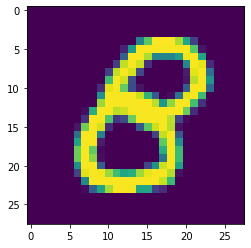

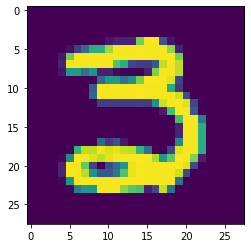

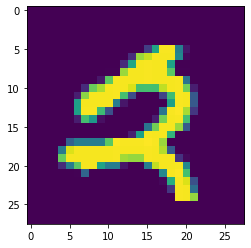

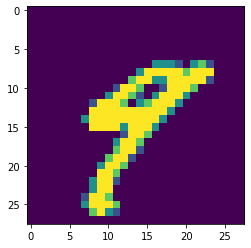

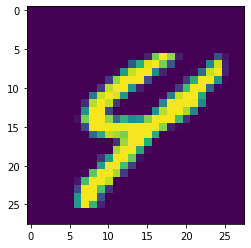

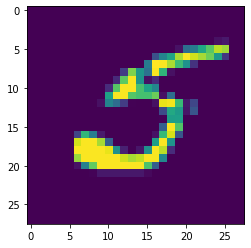

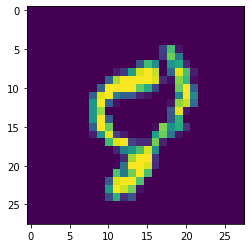

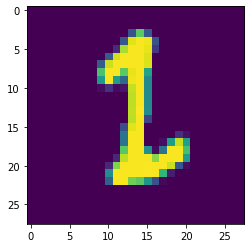

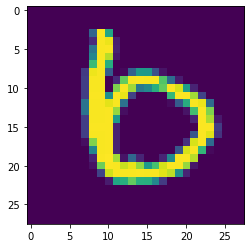

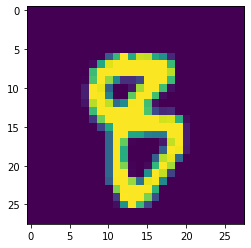

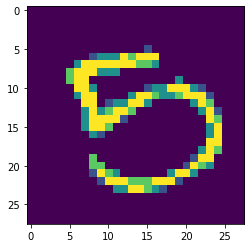

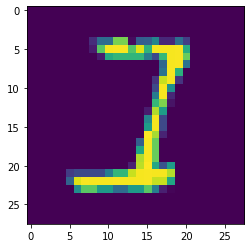

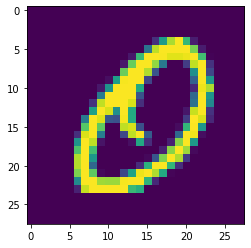

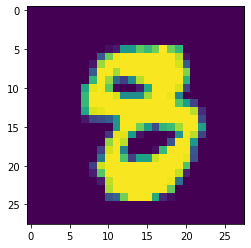

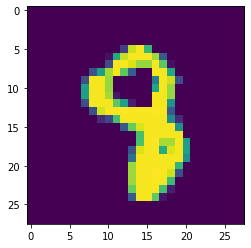

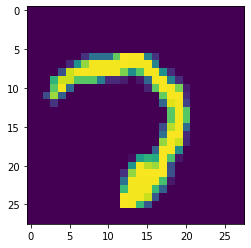

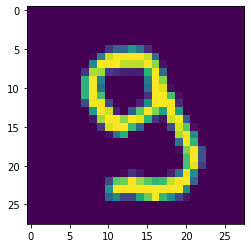

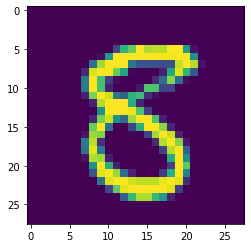

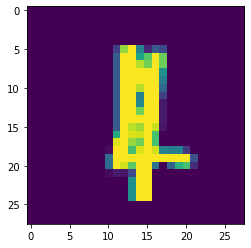

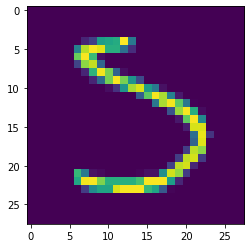

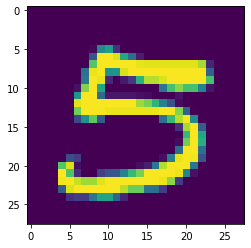

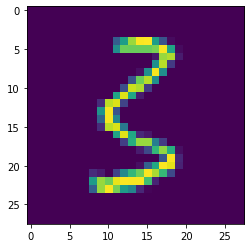

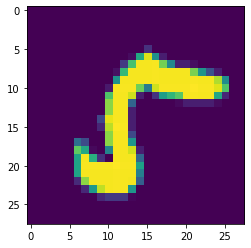

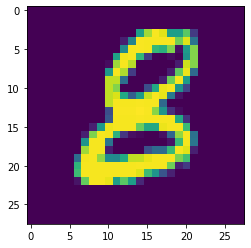

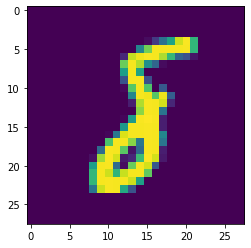

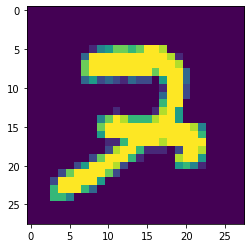

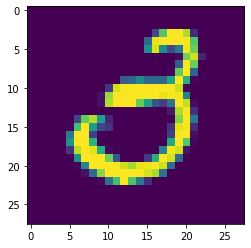

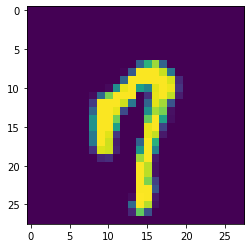

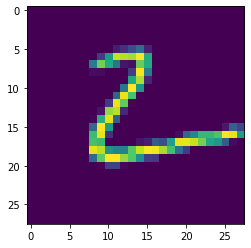

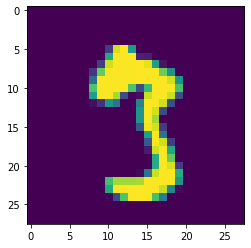

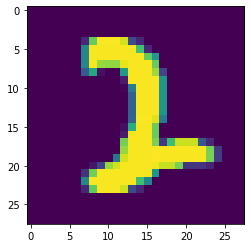

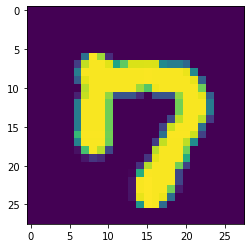

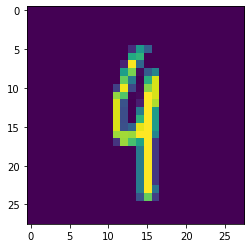

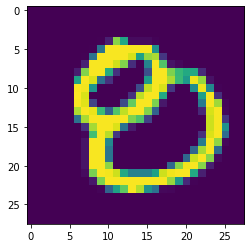

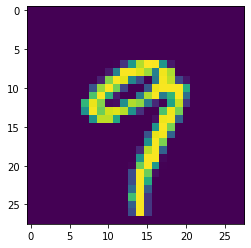

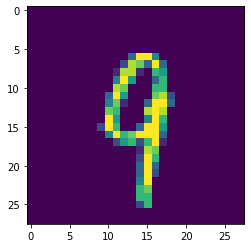

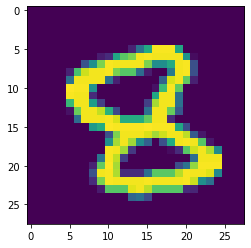

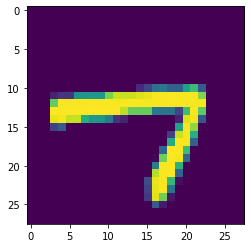

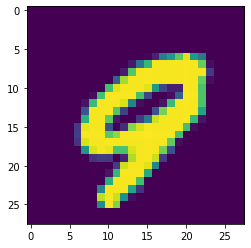

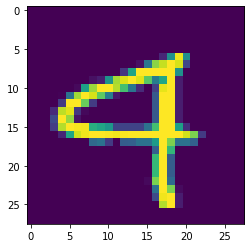

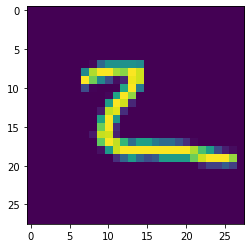

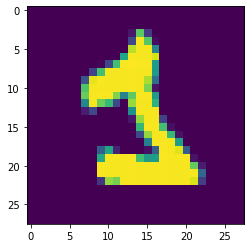

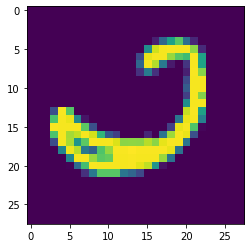

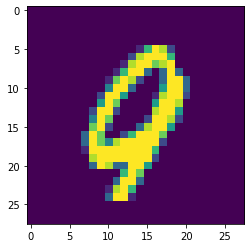

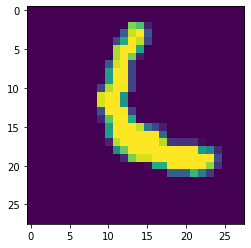

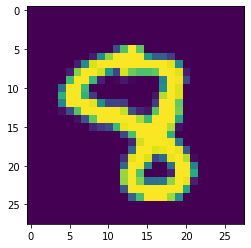

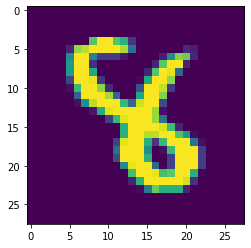

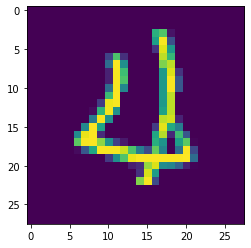

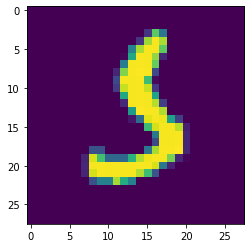

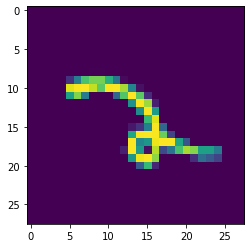

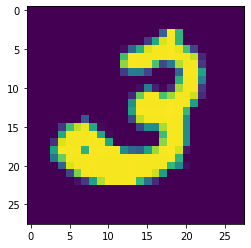

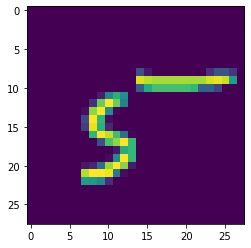

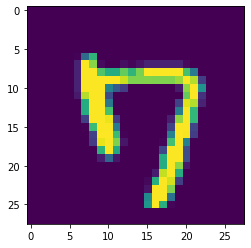

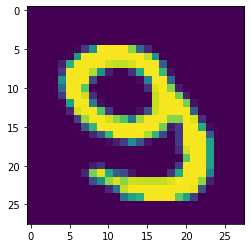

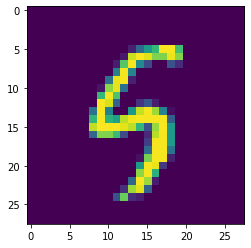

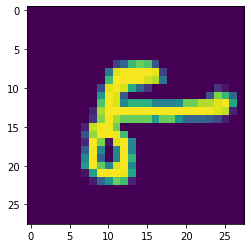

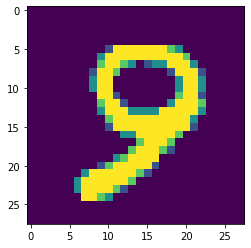

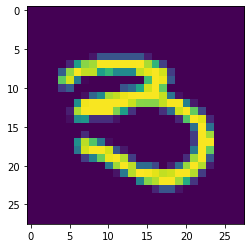

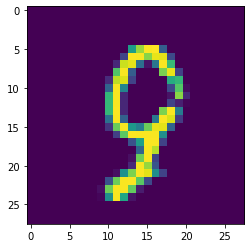

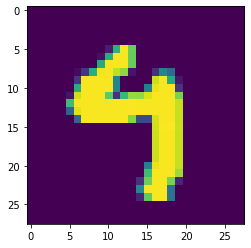

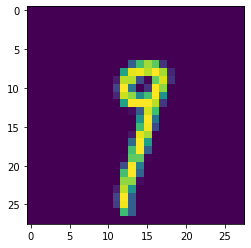

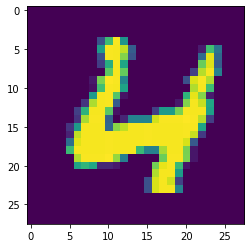

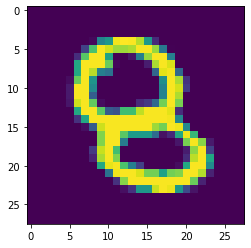

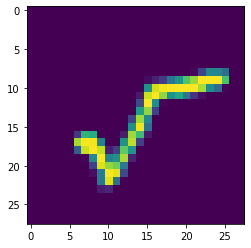

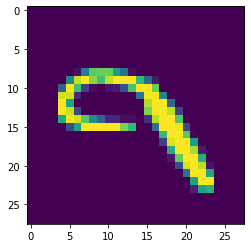

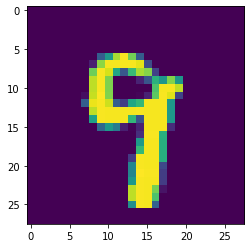

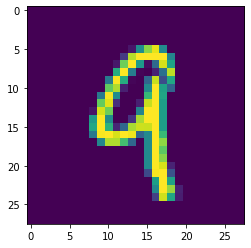

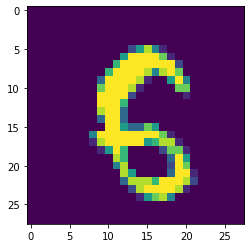

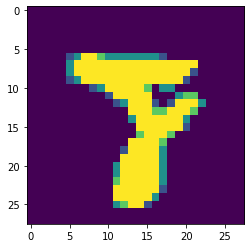

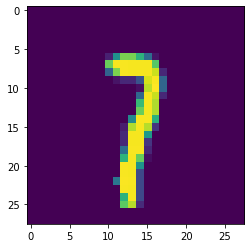

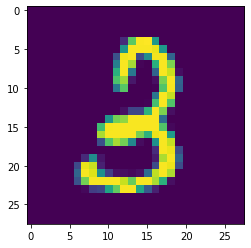

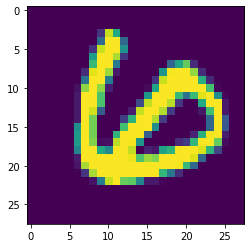

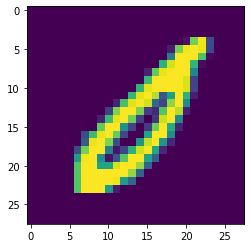

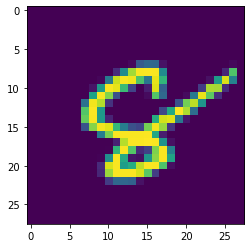

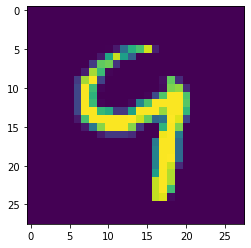

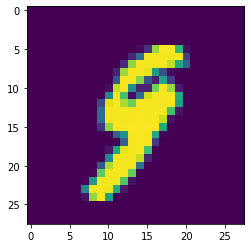

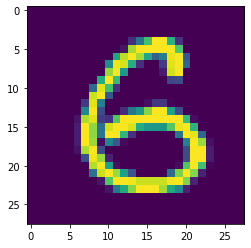

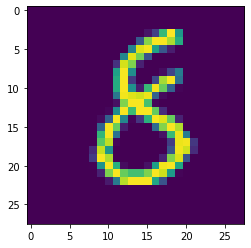

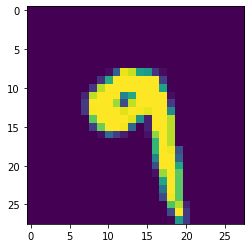

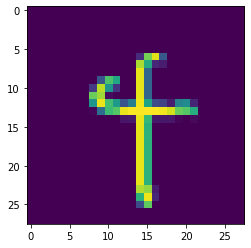

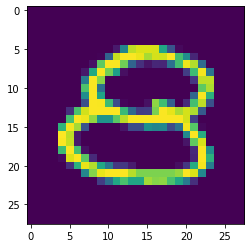

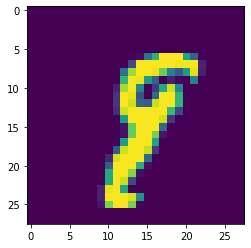

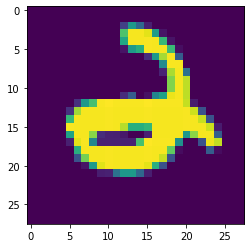

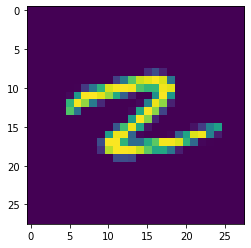

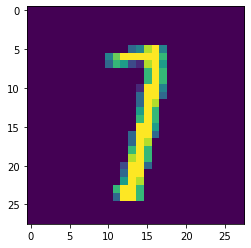

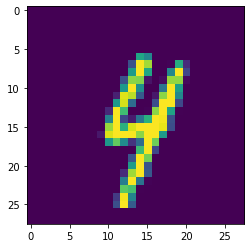

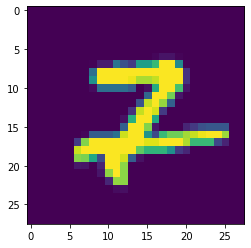

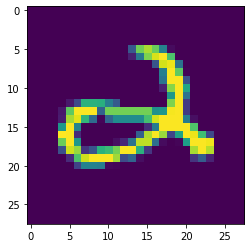

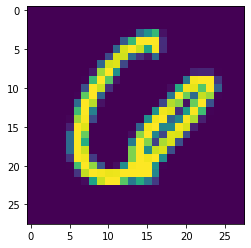

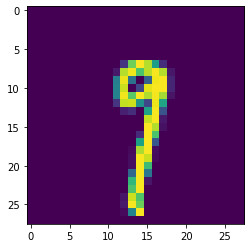

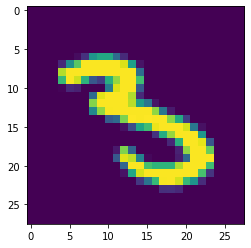

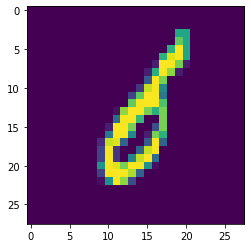

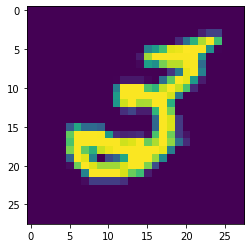

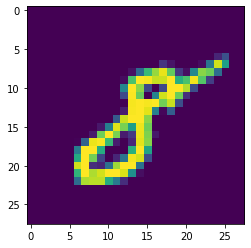

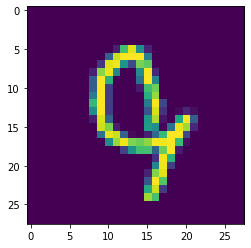

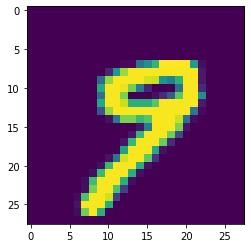

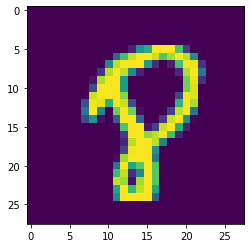

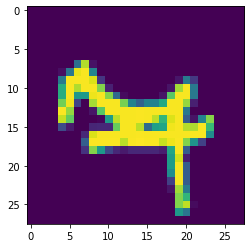

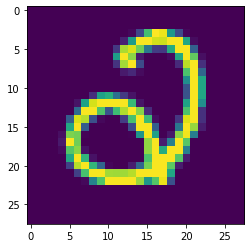

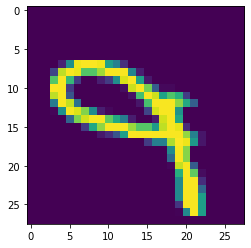

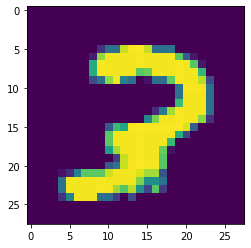

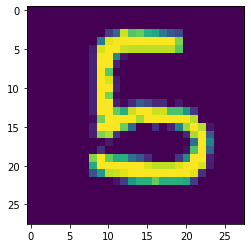

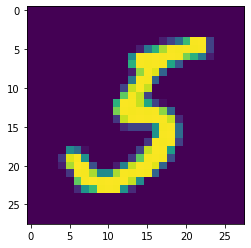

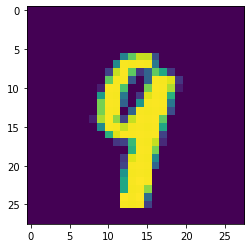

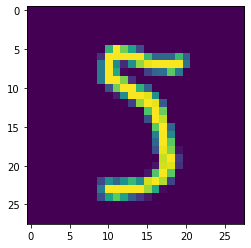

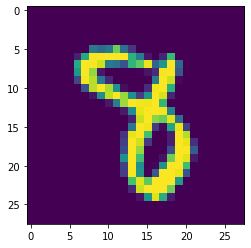

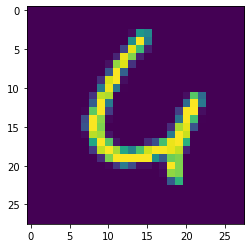

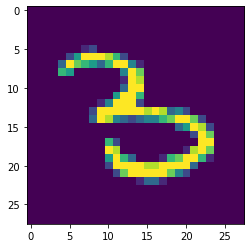

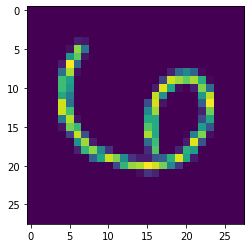

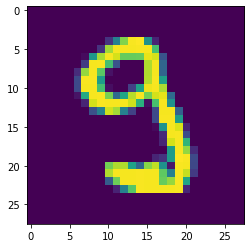

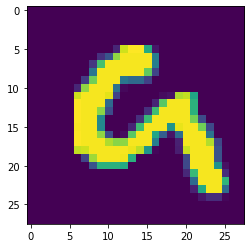

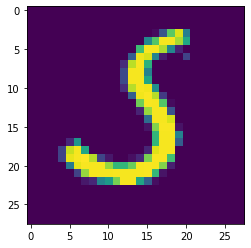

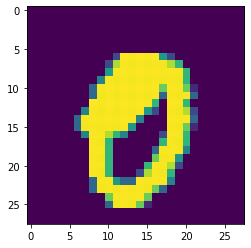

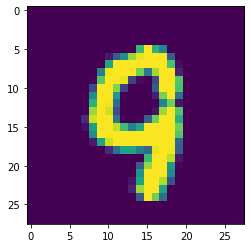

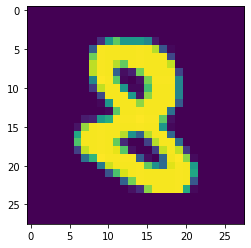

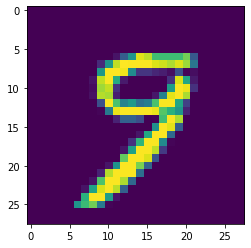

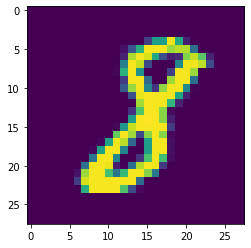

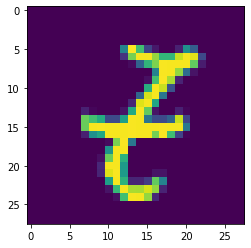

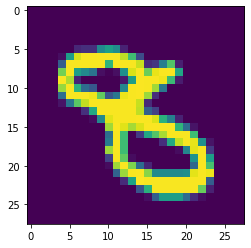

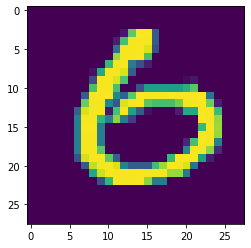

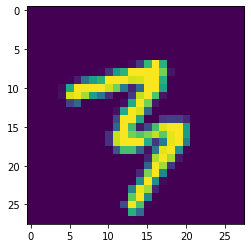

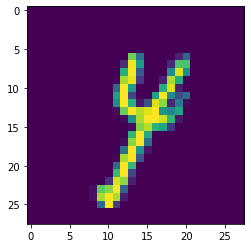

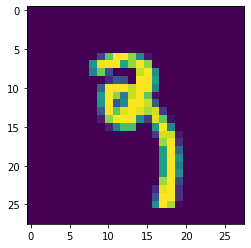

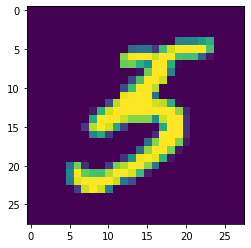

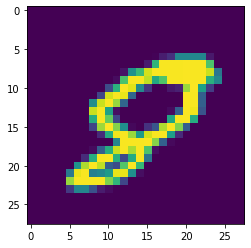

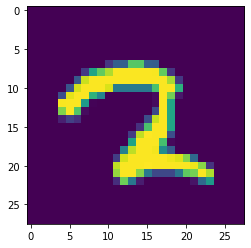

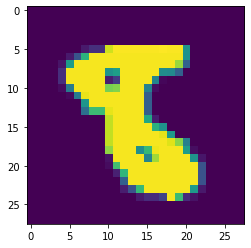

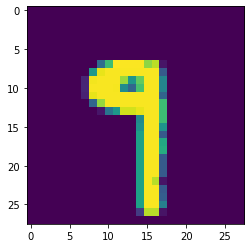

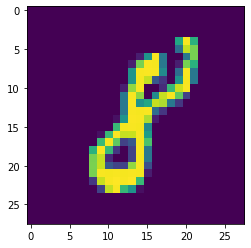

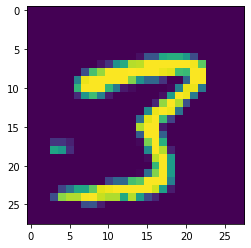

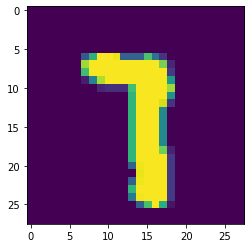

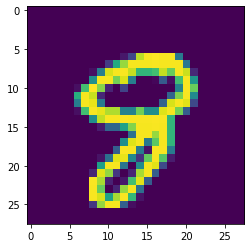

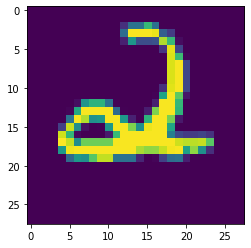

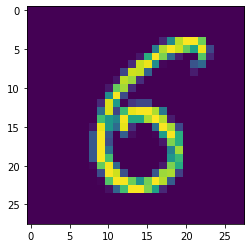

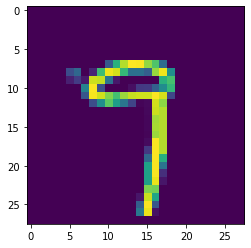

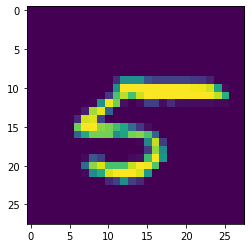

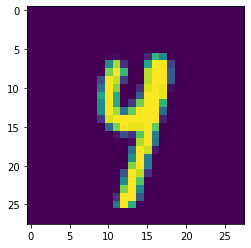

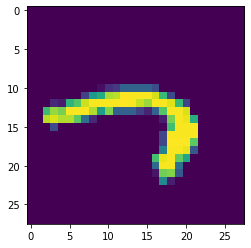

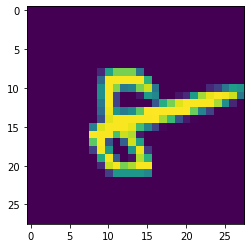

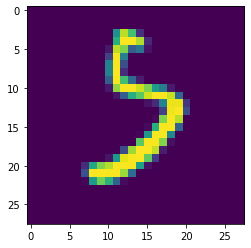

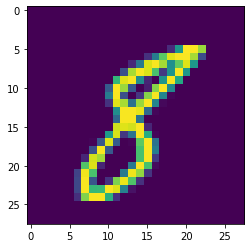

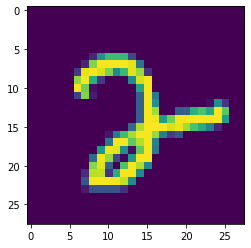

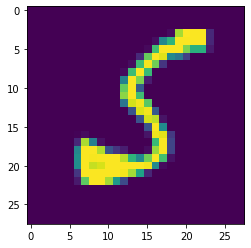

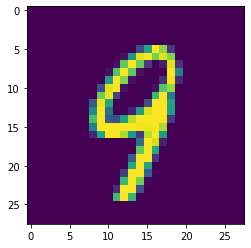

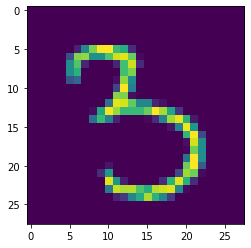

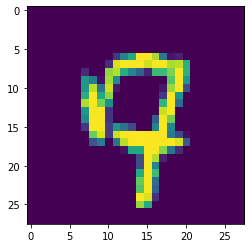

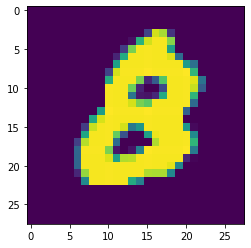

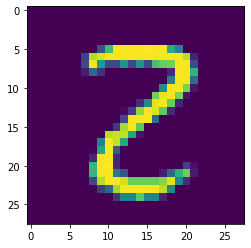

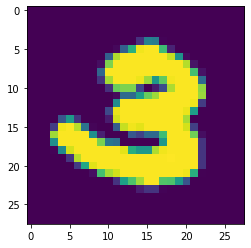

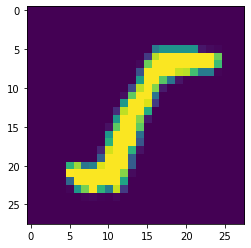

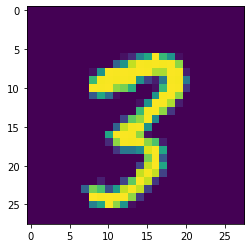

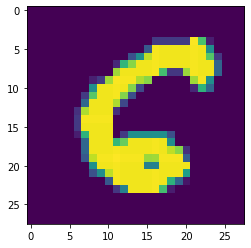

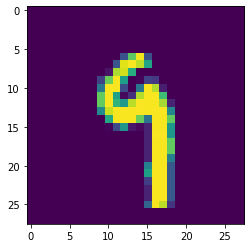

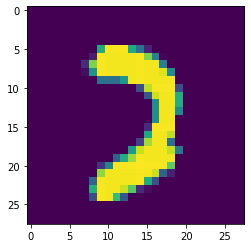

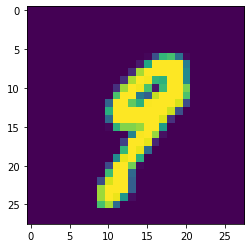

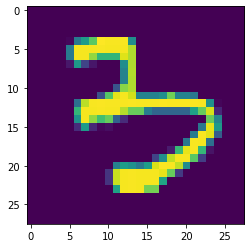

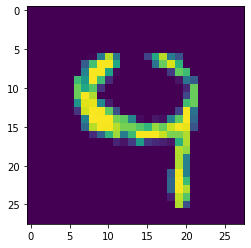

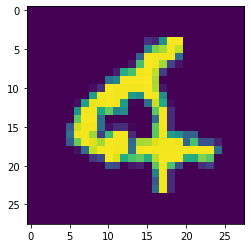

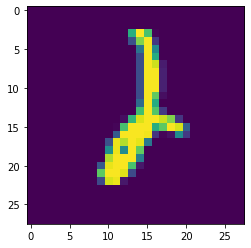

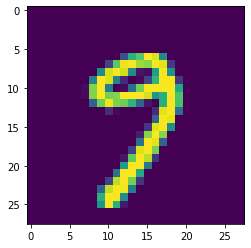

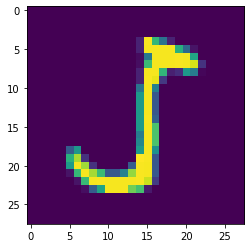

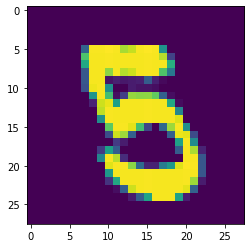

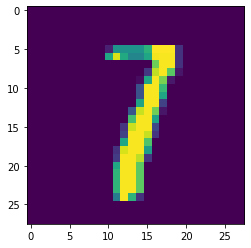

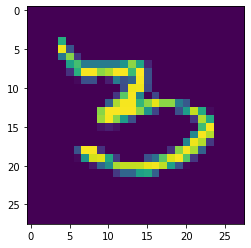

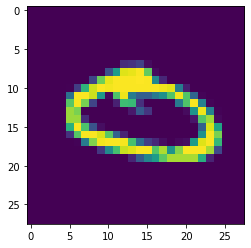

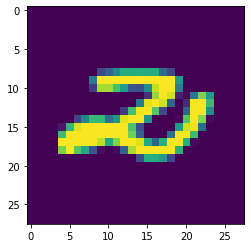

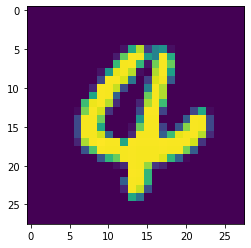

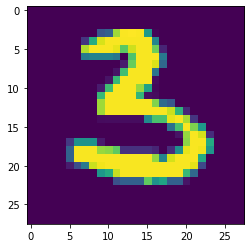

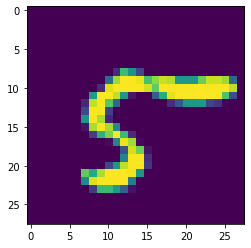

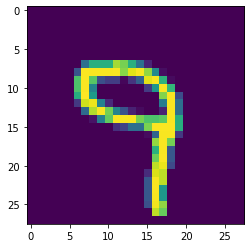

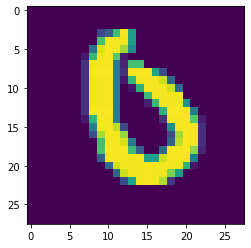

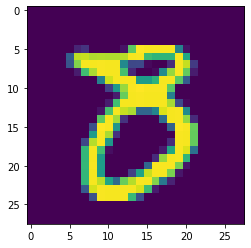

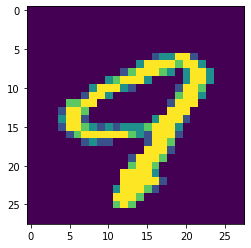

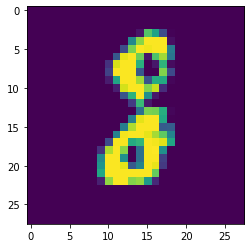

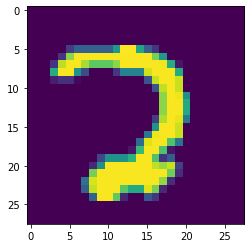

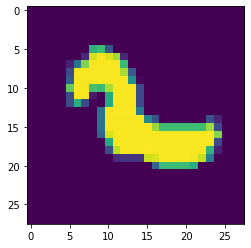

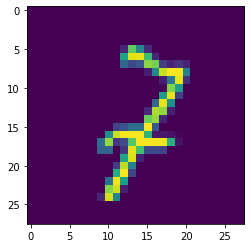

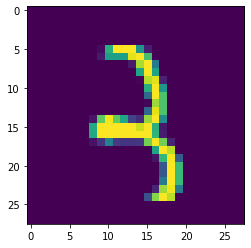

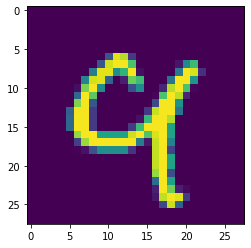

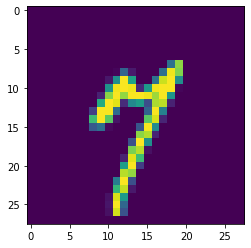

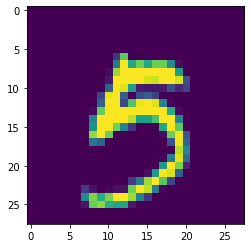

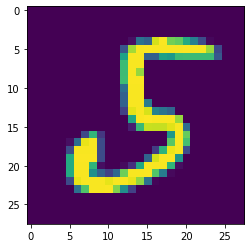

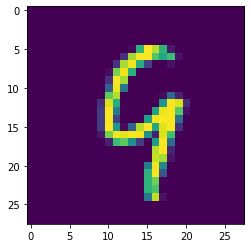

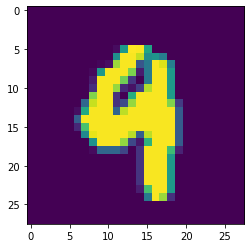

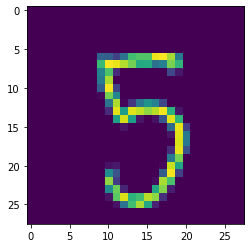

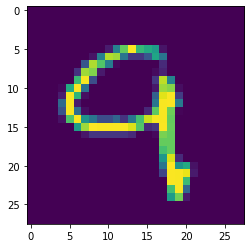

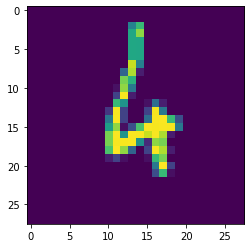

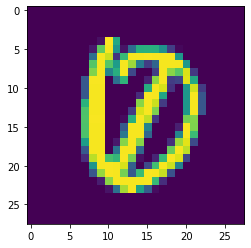

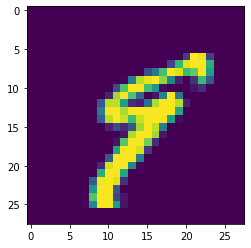

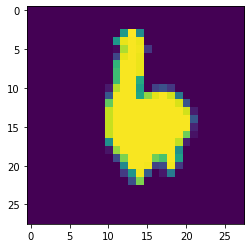

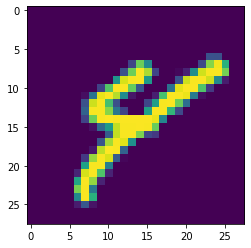

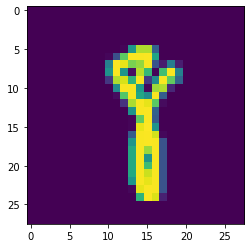

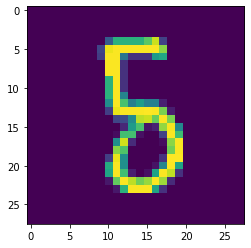

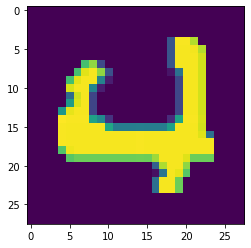

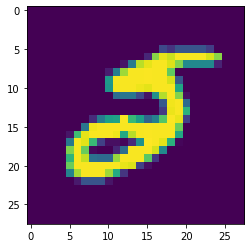

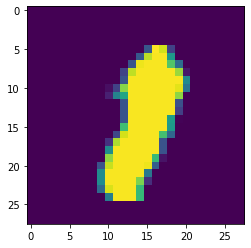

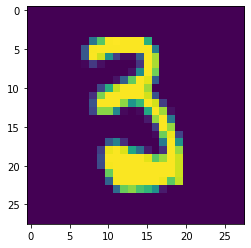

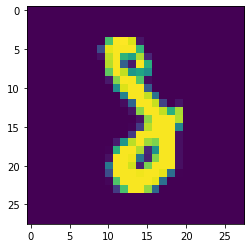

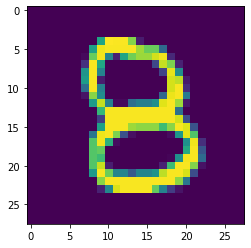

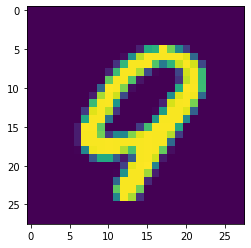

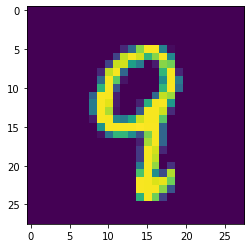

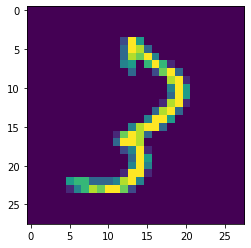

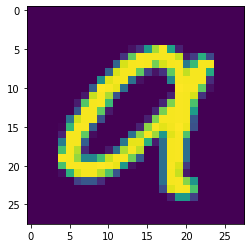

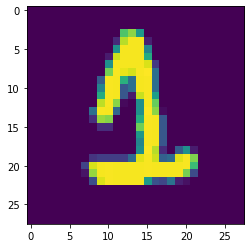

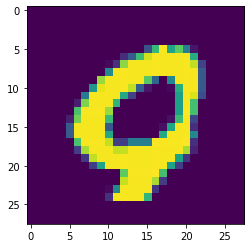

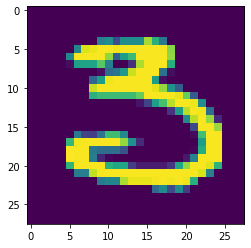

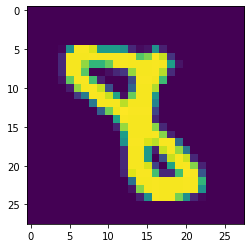

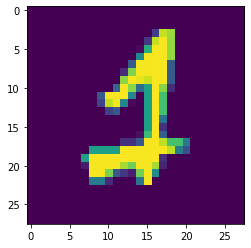

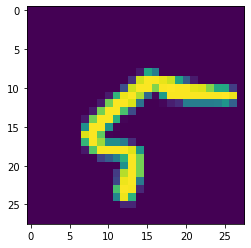

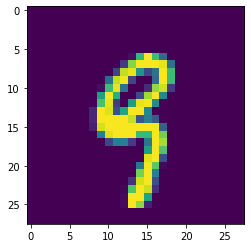

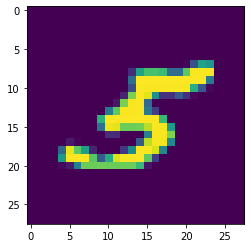

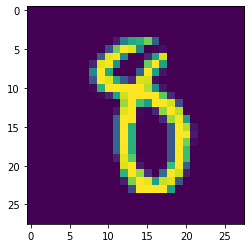

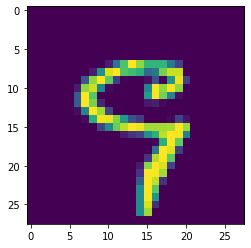

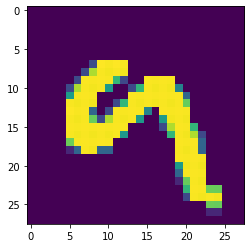

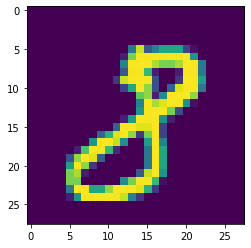

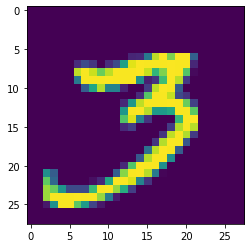

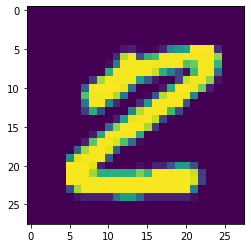

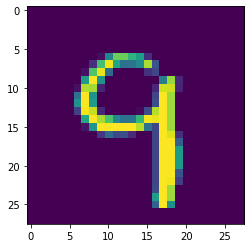

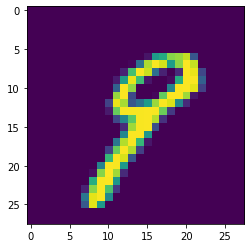

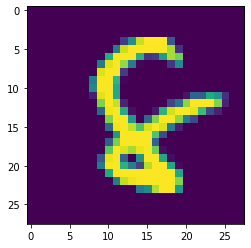

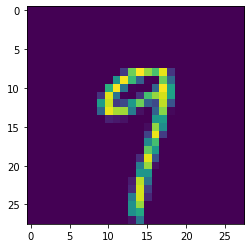

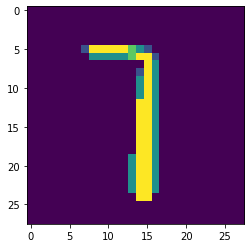

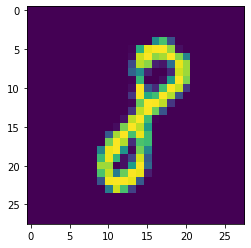

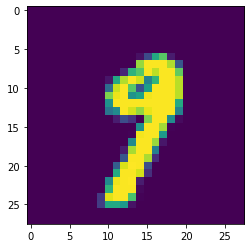

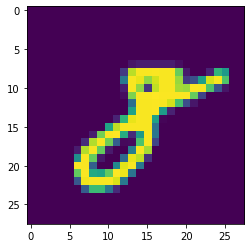

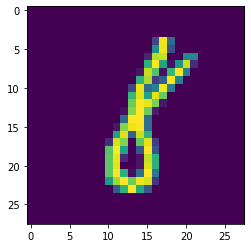

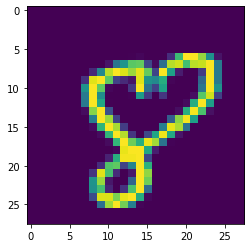

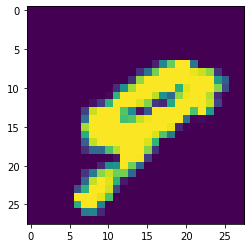

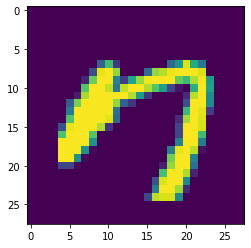

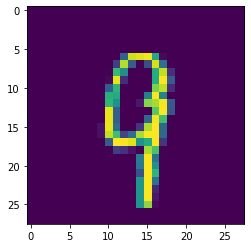

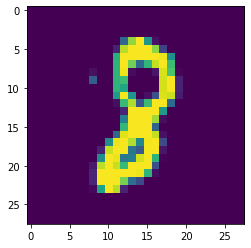

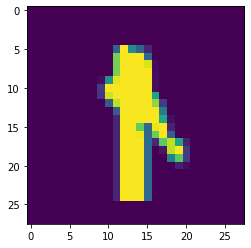

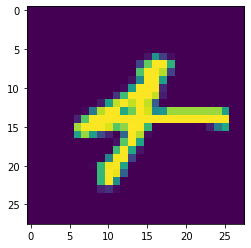

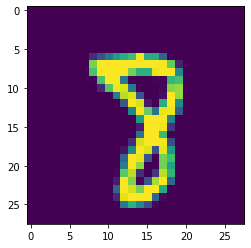

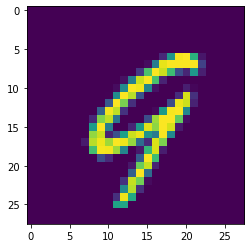

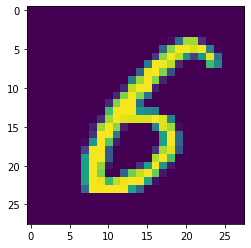

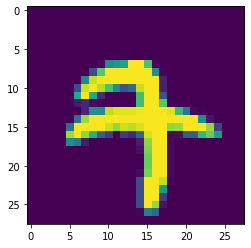

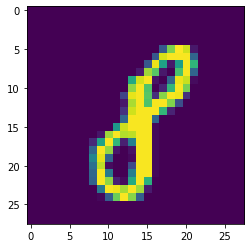

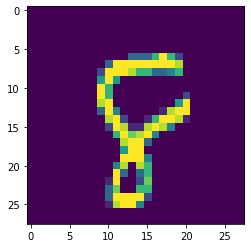

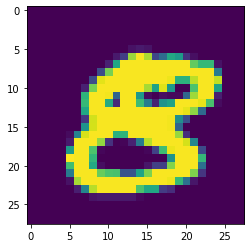

In [49]:

def get_bad_preds(y_test, y_pred_test):
    count = 0
    ind = []
    for val1, val2 in zip(y_test, y_pred_test):
        if(val1 != val2):
            ind.append(count)
        count +=1
    ind = np.array(ind)

    X_Bad = []
    for i in ind:
        X_Bad.append(X_test[i])

    X_Bad = np.array(X_Bad)

    return X_Bad

X_Bad = get_bad_preds(y_test, y_pred_test)

print(X_Bad.shape[0])
for val in X_Bad:
    plt.imshow(val.reshape((28,28)))
    plt.show()
    

        
        

## IC5B Extra layers
The network below implements a multilayer perceptron for the iris dataset that has a single hidden layer between the input and the softmax regression layer, which has 10 nodes.  **Add a second hidden layer after the first, which should have 15 nodes.**  Determine whether this added model complexity is justified by comparing the test set accuracy between the one-hidden-layer and two-hidden-layer models.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Load the dataset
iris = datasets.load_iris()
X = iris.data 
y = iris.target
X,X_test,y,y_test = train_test_split(X,y)

m = len(x)  # Number of irises
n_0 = 4     # Number of input features
n_1 = 10    # Number of hidden layer features
N = 3       # Number of classes

# Function to convert categorical labels into one-hot matrix.
def convert_to_one_hot(y,n_classes):
    T = np.zeros((y.shape[0],n_classes))
    for t,yy in zip(T,y):
        t[yy]=1   
    return T
T = convert_to_one_hot(y,N) 
T_test = convert_to_one_hot(y_test,N)

# Instantiate random parameters to begin with
W1 = 0.0001*np.random.randn(n_0,n_1)
W2 = 0.0001*np.random.randn(n_1,N)

b1 = 0.0*np.random.randn(1,n_1)
b2 = 0.0*np.random.randn(1,N)

# sigmoid activation function
def sigmoid(a):
    return 1./(1+np.exp(-a))

# softmax classification function
def softmax(A):
    numerator = np.exp(A)
    denominator = numerator.sum(axis=1)
    return numerator/denominator[:,np.newaxis]  

# Categorical cross-entropy
def L(T,S,W1,W2):
    return -1./len(T)*np.sum(T*np.log(S))

# Run the neural network forward
def feedforward(X,W1,W2,b1,b2):
    # Feedforward
    A1 = X@W1 + b1
    Z1 = sigmoid(A1)
    A2 = Z1@W2 + b2
    y_pred = softmax(A2)
    return y_pred,Z1

# Compute gradients with backpropagation
def backpropogate(y_pred,Z1,X,y_obs):
    # Backpropogate
    delta_2 = (1./len(y_pred))*(y_pred - y_obs)
    grad_W2 = Z1.T @ delta_2
    grad_b2 = delta_2.sum(axis=0)

    delta_1 = delta_2 @ W2.T * Z1*(1-Z1)
    grad_W1 = X.T @ delta_1 
    grad_b1 = delta_1.sum(axis=0) 
    return grad_W1,grad_W2,grad_b1,grad_b2

# set learning rate
eta = 1

# learn for a set number of epochs
for i in range(1000):
    y_pred,Z1 = feedforward(X,W1,W2,b1,b2)
    grad_W1,grad_W2,grad_b1,grad_b2 = backpropogate(y_pred,Z1,X,T)

    W1 -= eta*grad_W1
    W2 -= eta*grad_W2
    b1 -= eta*grad_b1
    b2 -= eta*grad_b2
    if i%10==0:
        y_pred_test,Z1_test = feedforward(X_test,W1,W2,b1,b2)
        acc = sum(y_test==np.argmax(y_pred_test,axis=1))/len(y_test)
        print(i,L(T,y_pred,W1,W2),acc)